## 1. Quick PCA review: The difference between 

### pca.fit() 
### pca.transform()
### pca.fit_transform()

## 2. Suppoort Vector Machine (SVM)

## 3. SVM Applied to Handwritten Digit Recognition

## SVC: Support Vector Classification
## In sklearn.svm.SVC() the default kernel is RBF
## For kernel parameters, see
## http://scikit-learn.org/stable/modules/svm.html#svm-classification

In [3]:
%matplotlib inline

''' Initial Imports'''

from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# ***use seaborn plotting style defaults
import seaborn as sns; sns.set()

from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits


#********************* KEY IMPORT OF THIS LECTURE********************************
from sklearn import svm #support vector machine



# loading handwritten digits
dig_data = load_digits()
X = dig_data.data
# y: the values of the digits, or "ground truth"
y = dig_data.target

print(type(X), X.dtype, X.shape)
print(type(y), y.dtype, y.shape)


<type 'numpy.ndarray'> float64 (1797, 64)
<type 'numpy.ndarray'> int64 (1797,)


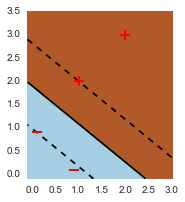

In [6]:
"""

Simple linear example.  Based on code by 

# Code source: Gaël Varoquaux
# License: BSD 3 clause

with significant modification.

This cell is heavily annotated with comments to facilitate your learning
-- please study carefully...and ask me questions if anything is unclear!


[Below I provide two examples of more sophisticaed python coding -- 
it's not required, but if you are interested:

1. numpy.c_ and numpy.r_
http://docs.scipy.org/doc/numpy-1.8.1/reference/generated/numpy.c_.html
http://stackoverflow.com/questions/18601001/numpy-r-is-not-a-function-what-is-it

In particular:
"[np.c_] is in reality not a function, but a class instance of RClass, which has __getindex__ implemented, 
so that you can use it as r_[1]. The cosmetic difference is that you use square brackets instead of curved ones, 
so you are not doing a function call, but you are actually indexing the object."]

2. numpy.mgrid

It's a similar idea:

http://students.mimuw.edu.pl/~pbechler/numpy_doc/reference/generated/numpy.mgrid.html


"""


# If you don't feel comfortable using the following
# then use np.column_stack()
# X = np.c_[(0.1, 0.9),
#           (0.9, 0.1),
#           #-- separating the two groups.
#           (1, 2),
#           (2, 3)].T

# dataset 
X = np.column_stack([(0.1, 0.9),
          (0.9, 0.1),
          #-- separating the two groups.
          (1, 2),
          (2, 3)]).T #transpose

# targets (or "ground truth")
Y = [-1] * 2 + [1] * 2


# fit the model; clf: classifier
clf = svm.SVC(kernel='linear') #support vector classification, kernel is linear meaning no transformations
clf.fit(X, Y) #"train"

# plot the line, the points
plt.figure(figsize=(4, 3))
plt.clf() #plot a clear figure


# zorder = 10 ("high") makes sure that the points are not covered by what's plotted below.
plt.scatter(X[:2, 0], X[:2, 1], marker = '_', c = 'r', s = 100, lw = 2, zorder = 10)
plt.scatter(X[2:, 0], X[2:, 1], marker = '+', c = 'r', s = 100, lw = 2, zorder = 10)

x_min = -0.1
x_max = 3
y_min = -0.1
y_max = 3.5

# A more sophisticated way (see docsting)
# XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
x = np.linspace(x_min, x_max, 200) #creating a 2D grid
y = np.linspace(y_min, y_max, 200)
XX, YY = np.meshgrid(x, y)

# The .flatten() method flattens a 2D array into a 1D array.
# To restore the original 2D shape, one can use the .reshape() method.
Z = clf.decision_function(np.column_stack([XX.flatten(), YY.flatten()]))

# Put the result into a color plot
Z = Z.reshape(XX.shape)

# classification map -- a binary array:
# class_map = 0 for the -ve region, and
# class_map = 1 for the +ve region.
class_map = Z > 0 #outputs a 2d binary array

# because the grid of XX and YY are not integers, 
# one has to explicitly specify the size of the image.
plt.imshow(class_map, cmap= plt.cm.Paired, 
           extent=[x_min, x_max, y_min, y_max], origin='lower')

plt.grid('off')

# Instead of imshow(), you can also do the following:
# plt.pcolormesh(XX, YY, classmap, cmap= plt.cm.Paired)

# color levels: 
# 0: meridian; -1: lower boundary; +1: upper boundary.
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
            levels=[-1, 0, 1])

# Setting limits for x and y axes.
plt.axis((x_min, x_max, y_min, y_max))
plt.show()




Linear kernel NOT sufficiet...




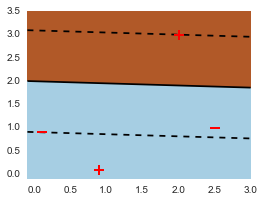

In [7]:
"""

Linear kernel NOT sufficiet...

"""
print(__doc__)


# New dataset and targets
X = np.column_stack([(0.1, 0.9),
          (2.5, 1),
          #-- separating the two groups.
          (2, 3),
          (0.9, 0.1)]).T
Y = [-1] * 2 + [1] * 2



plt.figure(figsize=(4, 3))
plt.clf()


plt.scatter(X[:2, 0], X[:2, 1], marker = '_', c = 'k', s = 100, lw = 2, zorder = 10)
plt.scatter(X[2:, 0], X[2:, 1], marker = '+', c = 'k', s = 100, lw = 2, zorder = 10)


# fit the model
clf = svm.SVC(kernel='linear')
clf.fit(X, Y)

plt.scatter(X[:2, 0], X[:2, 1], marker = '_', c = 'r', s = 100, lw = 2, zorder = 10)
plt.scatter(X[2:, 0], X[2:, 1], marker = '+', c = 'r', s = 100, lw = 2, zorder = 10)

Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
            levels=[-1, 0, 1])

plt.axis((x_min, x_max, y_min, y_max))


plt.show()




Linear kernel NOT sufficiet...use polynomial kernel.





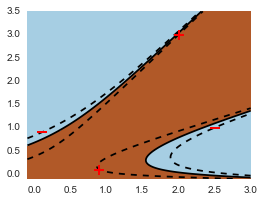

In [10]:
"""

Linear kernel NOT sufficiet...use polynomial kernel.


"""
print(__doc__)





# Same data and targets as above cell.


plt.figure(figsize=(4, 3))
plt.clf()


plt.scatter(X[:2, 0], X[:2, 1], marker = '_', c = 'k', s = 100, lw = 2, zorder = 10)
plt.scatter(X[2:, 0], X[2:, 1], marker = '+', c = 'k', s = 100, lw = 2, zorder = 10)




# fit the model
# degree = 1 is still linear
#clf = svm.SVC(kernel='poly', degree = 1, gamma = 2)  # nonlinear, still not nonlinear enough

# default: degree = 3, gamma = 1
#clf = svm.SVC(kernel='poly', gamma = 2)  # nonlinear, still not nonlinear enough

# Yay!!
clf = svm.SVC(kernel='poly', gamma = 3)  

clf.fit(X, Y)

plt.scatter(X[:2, 0], X[:2, 1], marker = '_', c = 'r', s = 100, lw = 2, zorder = 10)
plt.scatter(X[2:, 0], X[2:, 1], marker = '+', c = 'r', s = 100, lw = 2, zorder = 10)


Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
            levels=[-1, 0, 1])

plt.axis((x_min, x_max, y_min, y_max))


plt.show()




Linear kernel NOT sufficiet...use polynomial kernel; still not good enough...try rbf

You don't see the "gutter" because you need more than four points.  Feel free to come up with your own examples.





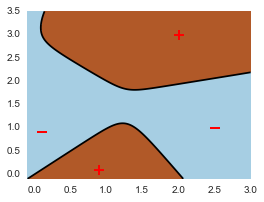

In [15]:
"""

Linear kernel NOT sufficiet...use polynomial kernel; still not good enough...try rbf

You don't see the "gutter" because you need more than four points.  Feel free to come up with your own examples.


"""
print(__doc__)


import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm



plt.figure(figsize=(4, 3))
plt.clf()

plt.scatter(X[:2, 0], X[:2, 1], marker = '_', c = 'k', s = 100, lw = 2, zorder = 10)
plt.scatter(X[2:, 0], X[2:, 1], marker = '+', c = 'k', s = 100, lw = 2, zorder = 10)


# fit the model
clf = svm.SVC(kernel='rbf', gamma=2, C=1)
clf.fit(X, Y)

plt.scatter(X[:2, 0], X[:2, 1], marker = '_', c = 'r', s = 100, lw = 2, zorder = 10)
plt.scatter(X[2:, 0], X[2:, 1], marker = '+', c = 'r', s = 100, lw = 2, zorder = 10)


XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
            levels=[-1, 0, 1])

plt.axis((x_min, x_max, y_min, y_max))


plt.show()


## Applying SVM Handwritten Digit Recogntion 

## Parameters to specify:

## - kernel: The default is 'rbf'.  For other kernels, see

## http://scikit-learn.org/stable/modules/svm.html#kernel-functions

## - Setting C: C is 1 by default and it’s a reasonable default choice. If you have a lot of noisy observations you should decrease it. It corresponds to "regularize" more the estimation: The parameter C, common to all SVM kernels, trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth (ignores noise), while a high C aims at classifying all training examples correctly (but maybe giving noise too much weight). 

## - If data for classification are unbalanced (e.g. many positive and few negative), set class_weight='balanced' and/or try different penalty parameters C.

## - (Particular to RBF) gamma: it defines how much influence a single training example has. The larger gamma is, the closer other examples must be to be affected.


<type 'numpy.ndarray'> float64 (1797, 64)
<type 'numpy.ndarray'> int64 (1797,)
Xtrain.shape, ytrain.shape (1796, 64) (1796,)
Xtest.shape, ytest.shape (1, 64) ()
(1796, 10)
(1, 10)


array([9])

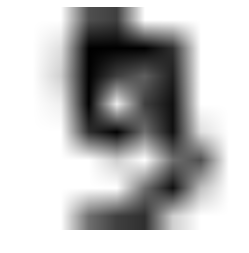

In [19]:
''' 
Now, we get the first "2" right!

The first "5" is still trouble, 
but even human can't necessarily tell that "5"!  

'''
dig_data = load_digits()
X = dig_data.data
y = dig_data.target
# This is basically each array in X
# getting reshaped into (8, 8).
dig_img = dig_data.images

print(type(X), X.dtype, X.shape)
print(type(y), y.dtype, y.shape)

select_idx = 9

# ********************************Separating training data from testing data****************
Xtrain = np.delete(X, select_idx, axis = 0)
ytrain = np.delete(y, select_idx)

# if you don't do .reshape(1, -1), you get a warning.
Xtest = X[select_idx].reshape(1, -1)
test_img = dig_img[select_idx]
ytest = y[select_idx]

print('Xtrain.shape, ytrain.shape', Xtrain.shape, ytrain.shape)
print('Xtest.shape, ytest.shape', Xtest.shape, ytest.shape)

plt.figure(figsize = (4, 4))
plt.imshow(test_img, cmap = 'binary')
plt.grid('off')
plt.axis('off')


# ************************************* The PCA Section ********************************
n_comp = 10

pca = PCA(n_comp)  

# finding pca axes
pca.fit(Xtrain)
# projecting training data onto pca axes
Xtrain_proj = pca.transform(Xtrain)
# projecting test data onto pca axes
Xtest_proj = pca.transform(Xtest)

print(Xtrain_proj.shape)
print(Xtest_proj.shape)


# ************************************* The SVM Section ********************************

# instantiating an SVM classifier
clf = svm.SVC(gamma=0.001, C=100.)

# apply SVM to training data and draw boundaries.
clf.fit(Xtrain_proj, ytrain)
# Use SVM-determined boundaries to make
# a prediction for the test data point.
clf.predict(Xtest_proj)


## Breakout:
## 1. Turn the above into a function
## classify_dig_svm(X, y, dig_img, select_idx, n_comp = 10, plot_test_img = False)
## where
## - X: data
## - y: targes ("ground truth")
## - select_idx: the index of the test data point
## - dig_img: 2D arrays of the digit image that corresponds to select_idx
## - plot_test_img: plot the above image, if True.
## - n_comp: how many PCA components to use
## 2. Test this function on select_idx = 0, 1, and 2.  One at a time.
## 3. Write a main program that does the "leave-one-out" test for all 1797 images.  But start with 50 images, just as we did in last class.

In [35]:
def classify_dig_svm(X, y, dig_img, select_idx, n_comp = 10, plot_test_img = False):
    
    # ********************************Separating training data from testing data****************
    Xtrain = np.delete(X, select_idx, axis = 0)
    ytrain = np.delete(y, select_idx)

    # if you don't do .reshape(1, -1), you get a warning.
    Xtest = X[select_idx].reshape(1, -1)
    test_img = dig_img[select_idx]
    ytest = y[select_idx]
    
    if plot_test_img:
        plt.figure(figsize = (4, 4))
        plt.imshow(test_img, cmap = 'binary')
        plt.grid('off')
        plt.axis('off')

    # ************************************* The PCA Section ********************************
    pca = PCA(n_comp)  

    # finding pca axes
    pca.fit(Xtrain)
    # projecting training data onto pca axes
    Xtrain_proj = pca.transform(Xtrain)
    # projecting test data onto pca axes
    Xtest_proj = pca.transform(Xtest)

#     print(Xtrain_proj.shape)
#     print(Xtest_proj.shape)


    # ************************************* The SVM Section ********************************

    # instantiating an SVM classifier
    clf = svm.SVC(gamma=0.001, C=100.)

    # apply SVM to training data and draw boundaries.
    clf.fit(Xtrain_proj, ytrain)
    # Use SVM-determined boundaries to make
    # a prediction for the test data point.
    return clf.predict(Xtest_proj)[0]

#select_idx = 3
#dig_pred = classify_dig_svm(X,y,dig_img,select_idx)

wrong = 0
n_try
for ind in range(n_try):
    dig_pred = classify_dig_svm(X,y,dig_img,ind,n_comp=15)
    if dig_pred != y[ind]:
        print(ind)
        wrong += 1

success_rate = 1 - wrong/n_try
print(success_rate)

5
37
69
123
421
480
0.988


# End of week 16